## Adoptable Dogs

### 데이터 소개
- 헝가리 유기견 보호소에 올라온 자료 데이터 셋
- 2397마리의 유기견들의 이름, 나이, 성별, 종류, 성격 등 19개의 특징이 모여있다
- 이중 정량적 분석이 가능한 컬럼 12컬럼 활용

### columns
- ID : 유기견 고유 번호
- name : 유기견 이름
- age : 유기견 나이
- sex : 유기견 성별
- breed : 유기견 견종
- date_found : 발견된 날 
- adoptable_from : 입양이 가능해진 날
- posted : 입양 공고를 올린 날
- color : 모색
- coat : 모 길이
- size : 크기
- neutered : 중성화 수술 여부

### 가설
- 가설 1) 여름에 많이 유기될 것이다
- 가설2) 믹스견이 가장 많이 유기될 것이다
    - 순종 중에서도 유기된 견들은 크기가 큰 견종일 것이다
- 가설3) 암컷이 가장 더 많이 유기될 것이다
- 가설4) 나이가 많을수록 많이 유기될 것이다

### 도메인 조사 - 헝가리 애완견 문화

- 서유럽보다는 5년 정도 늦은 애견 에티켓 문화 시작(애견 배설물 쓰레기통 도입, 2012년 기준)
    - 애견 에티켓 문화로 반려견 케어에 대한 책임감 증가
- 2012년 애견(보유)세 도입
    - 애견세 도입으로 신중한 입양 문화 구축
- 2012년 기준 경기침체로 성장속도는 점차 둔화되지만 애견용품 시장은 2010년도에 7.1%, 2011년도에는 6.5%의 성장세를 보이며 선전함
    - 다른 동유럽 국가에 비해 애완용품에 투자하는 비용이 많음
- 주로 키우는 견종 크기는 중/대형견 견종을 많이 키운다

### EDA

In [350]:
import warnings
warnings.filterwarnings(action='ignore')

In [339]:
# Load DataSet(2937 * 19 columns)
df_dog = pd.read_csv("./ShelterDogs.csv")
df_dog.tail()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
2932,118,Fodri,16.92,male,Unknown Mix,2003-12-25,2003-12-25,2006-03-22,yellow-brown,short,medium,no,no,yes,yes,no,yes,no,garden
2933,262,Csibi,17.33,female,Staffordshire Terrier Mix,2004-08-27,2004-08-27,2005-07-08,striped,short,large,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,4,Konrád,18.17,male,Unknown Mix,2005-09-21,2005-09-21,2005-10-26,black,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2935,141,Kölni,17.17,male,Unknown Mix,2004-11-27,2004-11-27,2005-05-02,black and brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2936,248,Kedves,16.08,male,"German Shepherd Dog, Hound Mix",2005-04-02,2005-04-02,2005-06-30,sable,short,medium,yes,NaN,yes,NaN,yes,yes,NaN,both flat and garden


In [340]:
### colum type 정리
df_dog['date_found(clear)'] = pd.to_datetime(df_dog['date_found'])
df_dog['adoptable_from(clear)'] = pd.to_datetime(df_dog['adoptable_from'])
df_dog['posted(clear)'] = pd.to_datetime(df_dog['posted'])

In [341]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2937 non-null   int64         
 1   name                   2845 non-null   object        
 2   age                    2937 non-null   float64       
 3   sex                    2937 non-null   object        
 4   breed                  2937 non-null   object        
 5   date_found             2937 non-null   object        
 6   adoptable_from         2937 non-null   object        
 7   posted                 2937 non-null   object        
 8   color                  2937 non-null   object        
 9   coat                   2937 non-null   object        
 10  size                   2937 non-null   object        
 11  neutered               1852 non-null   object        
 12  housebroken            460 non-null    object        
 13  lik

In [342]:
df_dog.describe()

,ID,age
count,2937.000000,2937.000000
mean,1742.655431,8.569551
std,4023.313413,4.140216
min,1.000000,0.150000
25%,167.000000,5.830000
50%,556.000000,8.670000
75%,1451.000000,11.250000
max,23809.000000,21.920000


### 가설 1) 여름에 많이 유기될 것이다

In [343]:
### 날짜에서 달 추출하기

df_dog['date_found_year'] = pd.to_datetime(df_dog['date_found']).dt.strftime('%Y')
df_dog['date_found_month'] = pd.to_datetime(df_dog['date_found']).dt.strftime('%m')
df_dog['date_found_day'] = pd.to_datetime(df_dog['date_found']).dt.strftime('%d')

In [344]:
df_dog['date_found_month'] = df_dog['date_found_month'].astype(int)

In [345]:
df_dog_group = df_dog.groupby('date_found_month').size().reset_index()
df_dog_group2 = df_dog_group.rename(columns={0:'count'})
df_dog_group2_sort = df_dog_group2.sort_values('count', ascending=False)
df_dog_group2_sort2 = df_dog_group2_sort.reset_index().drop('index', axis=1)

df_dog_group2_sort2

,date_found_month,count
0,1,350
1,5,286
2,3,260
3,12,250
4,2,243
5,6,237
6,4,232
7,8,229
8,9,226
9,10,220


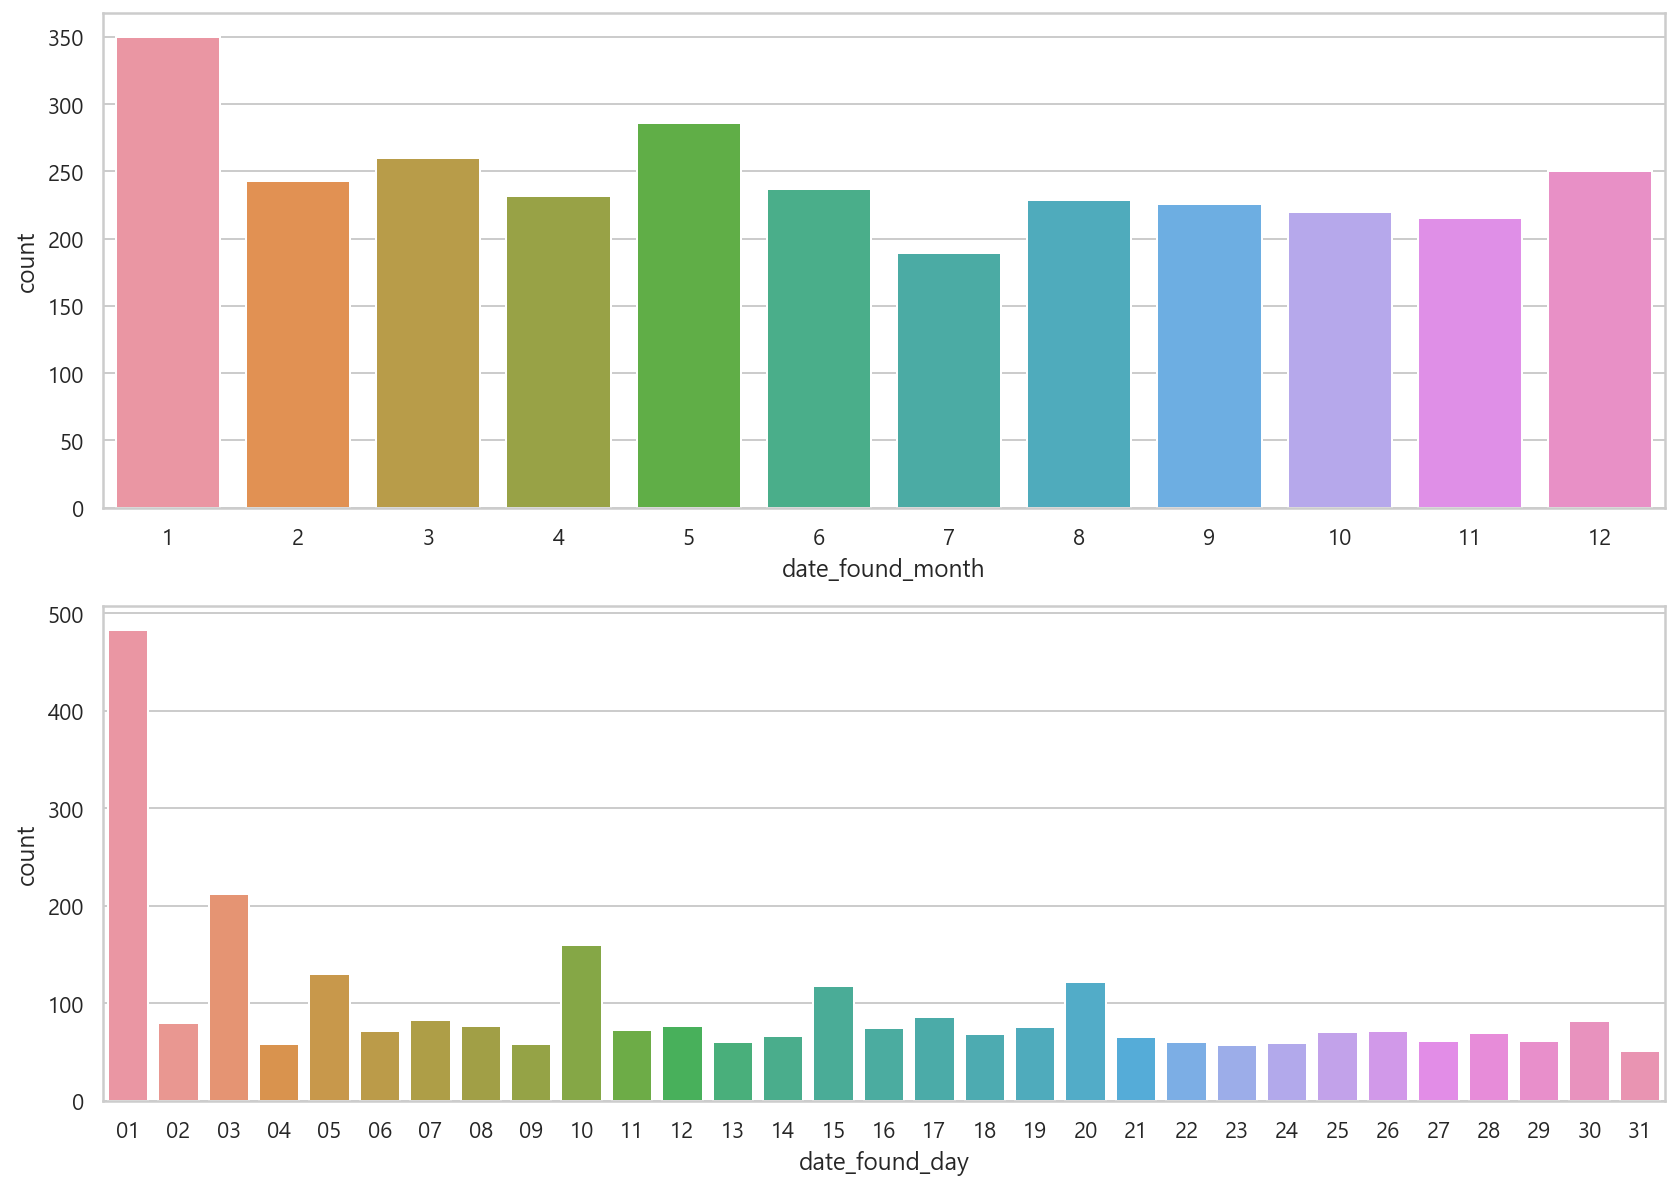

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

sns.set(style='whitegrid', font='Malgun Gothic', palette='bright')

plt.subplot(211)
ax = sns.countplot(x="date_found_month", data=df_dog )

plt.subplot(212)
ax = sns.countplot(x="date_found_day", data=df_dog )

In [351]:
#season 구분 코드

df_dog['season'] = ""
for i in range(len(df_dog)):
    
    if df_dog['date_found_month'][i] == 12 or df_dog['date_found_month'][i] == 1 or df_dog['date_found_month'][i] == 2:
        df_dog['season'][i] = 'winter'
        
    elif df_dog['date_found_month'][i] == 3 or df_dog['date_found_month'][i] == 4 or df_dog['date_found_month'][i] == 5:
        df_dog['season'][i] = 'spring'
    
    elif df_dog['date_found_month'][i] == 6 or df_dog['date_found_month'][i] == 7 or df_dog['date_found_month'][i] == 8:
        df_dog['season'][i] = 'summer'
    
    else:
        df_dog['season'][i] = 'fall'

In [352]:
#unique 값 확인
df_dog[df_dog['season'] == 'winter']['date_found_month'].unique()

array([12,  2,  1])

In [353]:
#계절별로 합산해서 그래프로 그리기
season_count = df_dog['season'].value_counts().sort_values(ascending=False)
df_season_count = pd.DataFrame(season_count)
df_season_count.index.name ='season'
df_season_count.columns.values[0] = 'count'
df_season_count2 = df_season_count.reset_index()
df_season_count2

,season,count
0,winter,843
1,spring,778
2,fall,661
3,summer,655


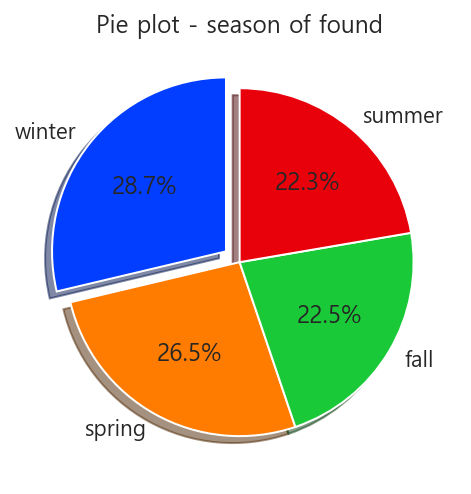

In [354]:
#유기 계절별 파이 그래프
labels = df_season_count2['season']
sizes = df_season_count2['count']

explode = (0.1, 0, 0, 0) # 겨울만 강조(winter, sprint, fall, summer)

fig, ax = plt.subplots(figsize = (9, 4))
ax.pie(sizes, explode=explode,labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
#ax.axis('eqaul')

ax.set_title('Pie plot - season of found')
plt.show()

#### 검증1) 1월에 발견된 수가 350건(약 11.9%)으로 가장 큰 수였지만 계절별로 비교해서 차지하지만, 그 뒤를 5월과 3월이 뒤쫓고 있다.
####            계절별로 구분해도, 겨울(28.7%) > 봄(26.5%) > 가을(22.5%) > 여름(22.3%)으로 계절별 유기율 별로 차이가 없다.

### 가설2) 믹스견이 가장 많이 유기될 것이다

In [355]:
# 전체 견종 수는 277 종류
len(df_dog['breed'].unique())

277

In [356]:
df_dog['breed'].value_counts()

Unknown Mix                               1524
German Shepherd Dog Mix                    190
Dachshund Mix                              147
Labrador Retriever Mix                      83
Staffordshire Terrier Mix                   62
                                          ... 
Beagle, Hound Mix                            1
Bearded Collie, Labrador Retriever Mix       1
Tibetan Terrier Mix                          1
Basset Hound, Dachshund Mix                  1
Golden Retriever, Setter, Vizsla Mix         1
Name: breed, Length: 277, dtype: int64

In [357]:
df_breed_group = df_dog.groupby('breed').size().reset_index()
df_breed_group2 = df_breed_group.rename(columns={0:'count'})
df_breed_group2_sort = df_breed_group2.sort_values('count', ascending=False)
df_breed_group2_sort2 = df_breed_group2_sort.reset_index().drop('index', axis=1)

df_breed_group2_sort2

,breed,count
0,Unknown Mix,1524
1,German Shepherd Dog Mix,190
2,Dachshund Mix,147
3,Labrador Retriever Mix,83
4,Staffordshire Terrier Mix,62
...,...,...
272,"English Cocker Spaniel, Vizsla Mix",1
273,English Greyhound Mix,1
274,"English Greyhound, Spanish Greyhound Mix",1
275,"Fox Terrier, German Shepherd Dog Mix",1


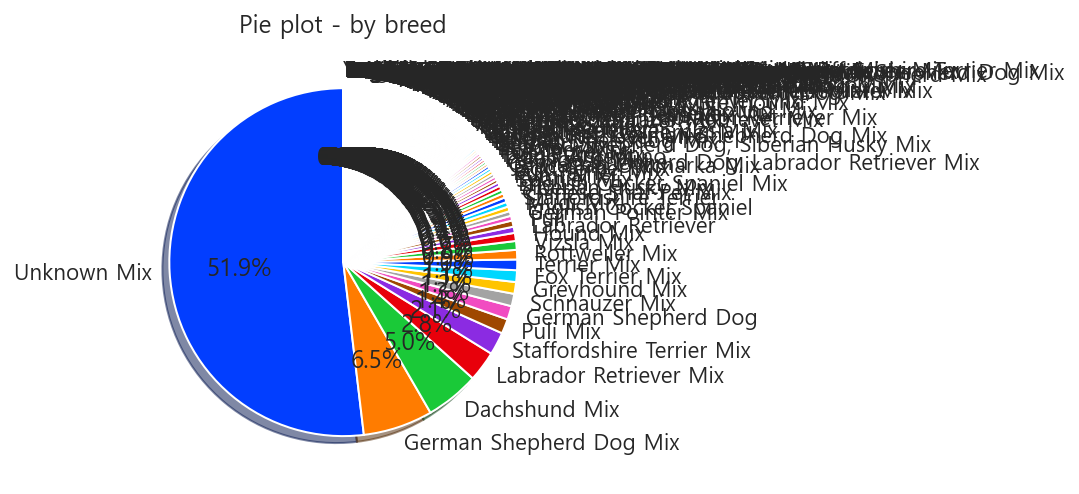

In [358]:
#유기 종별 파이 그래프
labels = df_breed_group2_sort2['breed']
sizes = df_breed_group2_sort2['count']

#explode = (0.1, 0, 0, 0)

fig, ax = plt.subplots(figsize = (9, 4))
ax.pie(sizes, labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
#ax.axis('eqaul')

ax.set_title('Pie plot - by breed')
plt.show()

##### Unknown Mix가 51.9% 유기율이 가장 높다

In [359]:
def find_mix(breed):
    if "Mix" in breed:
        return 1
    else:
        return 0
    

In [360]:
df_breed_group2_sort2['mix'] = df_breed_group2_sort2['breed'].apply(find_mix)

In [361]:
df_breed_group2_sort2['mix'].value_counts()

1    227
0     50
Name: mix, dtype: int64

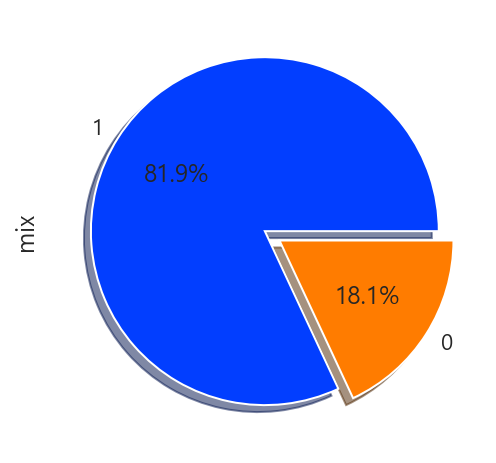

In [362]:
df_breed_group2_sort2['mix'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.1f%%', shadow=True)

plt.show()

#### 그 외에도 보호소 유기견 중 81.9%가 Mix 견이다

In [363]:
range(len(df_breed_group2_sort2))

range(0, 277)

In [364]:
df_breed_group2_sort3 = df_breed_group2_sort2[df_breed_group2_sort2['breed'] != 'Unknown Mix']

In [365]:
df_breed_group2_sort4 = df_breed_group2_sort3.reset_index(drop=True)

In [366]:
count_mixed_breeds = [] 

for i in range(len(df_breed_group2_sort4)):
    mix_breed =df_breed_group2_sort4['breed'][i].split(',')
    count_mixed_breed = len(mix_breed)
    count_mixed_breeds.append(count_mixed_breed)
               
df_breed_group2_sort4['count_mixed_breed'] =  count_mixed_breeds

In [367]:
df_breed_group2_sort4['count_mixed_breed'].sort_values(ascending=False)

137    3
256    3
244    3
123    3
235    3
      ..
115    1
114    1
113    1
109    1
0      1
Name: count_mixed_breed, Length: 276, dtype: int64

In [368]:
df_breed_group2_sort4['str_mixed_breed'] = df_breed_group2_sort4['count_mixed_breed'].astype(str)

In [369]:
df_breed_group2_sort4

,breed,count,mix,count_mixed_breed,str_mixed_breed
0,German Shepherd Dog Mix,190,1,1,1
1,Dachshund Mix,147,1,1,1
2,Labrador Retriever Mix,83,1,1,1
3,Staffordshire Terrier Mix,62,1,1,1
4,Puli Mix,40,1,1,1
...,...,...,...,...,...
271,"English Cocker Spaniel, Vizsla Mix",1,1,2,2
272,English Greyhound Mix,1,1,1,1
273,"English Greyhound, Spanish Greyhound Mix",1,1,2,2
274,"Fox Terrier, German Shepherd Dog Mix",1,1,2,2


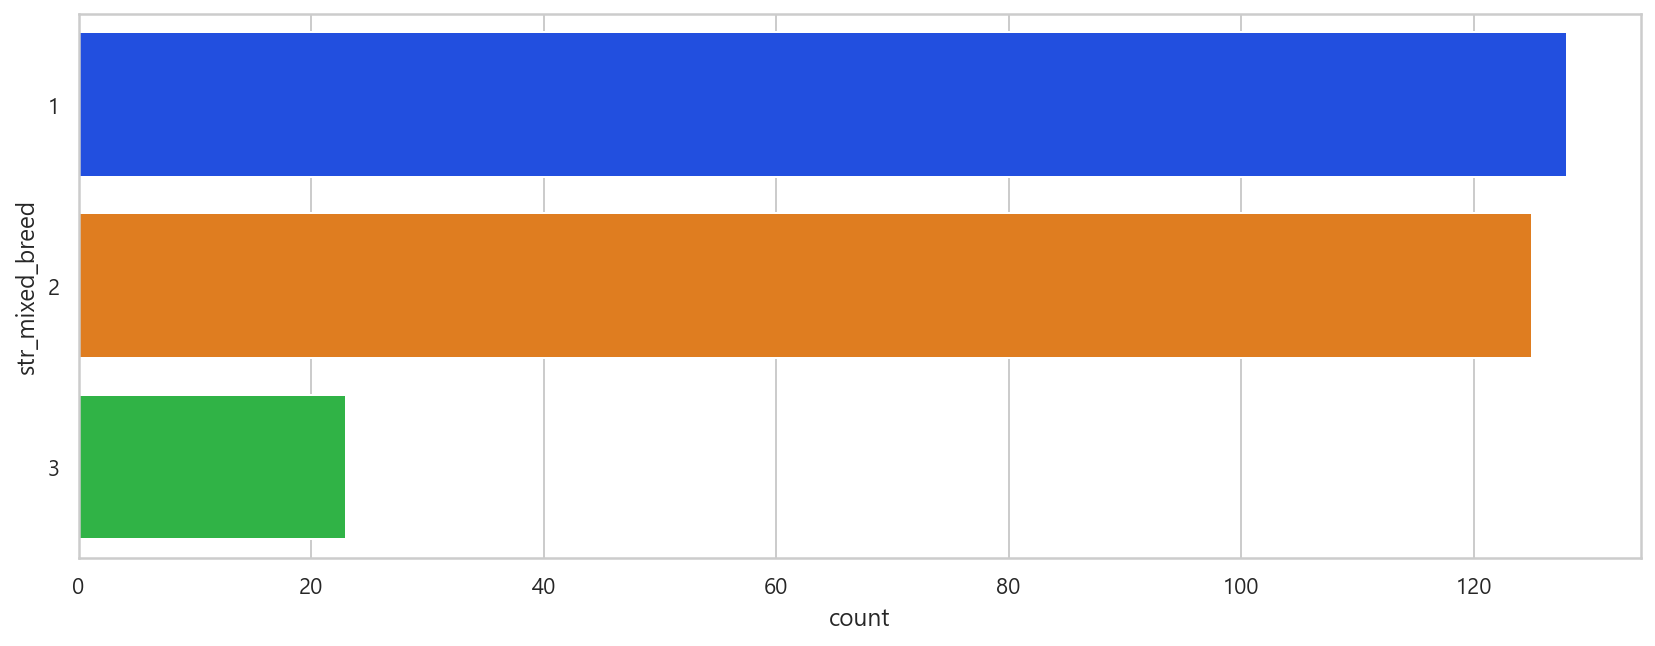

In [370]:
plt.figure(figsize=(14, 5))

sns.countplot(y='str_mixed_breed', data=df_breed_group2_sort4)

#### Unknown Mix가 아닌 수 중 3종류가 섞인 견종도 20마리나 있다. 

#### 순종 중에도 유기견이 50마리 정도 있었는데, 주로 어떤 사이즈가 개들이 유기견이 됐는지 궁금하다

In [371]:
df_purebreed = df_breed_group2_sort4[df_breed_group2_sort4['mix'] == 0]

In [372]:
df_purebreed[['breed', 'count', 'mix']]

,breed,count,mix
5,German Shepherd Dog,37,0
13,Labrador Retriever,17,0
14,Puli,17,0
16,English Cocker Spaniel,13,0
18,Staffordshire Terrier,13,0
29,Dogo Argentino,8,0
31,Fox Terrier,7,0
35,Beagle,7,0
37,Kuvasz,6,0
40,Rottweiler,5,0


#### 순종 중 가장 많은 유기견종 top3 : 
- German Shepherd Dog
- Labrador Retriever
- Puli

In [373]:
df_dog[df_dog['breed'] == 'German Shepherd Dog']['size'].value_counts()

large     21
medium    16
Name: size, dtype: int64

In [374]:
df_dog[df_dog['breed'] == 'Labrador Retriever']['size'].value_counts()

large     13
medium     4
Name: size, dtype: int64

In [375]:
df_dog[df_dog['breed'] == 'Puli']['size'].value_counts()

medium    17
Name: size, dtype: int64

#### small 사이즈인 견이 확실히 비율이 작긴 하지만, count(medium) > count(large) 이므로 크기는 별로 차이가 없는 것 같다

In [376]:
df_merged_bypurebreed = pd.merge(df_dog, df_purebreed, on='breed', how='inner')
df_merged_bypurebreed_feature = df_merged_bypurebreed[['breed', 'color', 'coat', 'size']]
df_merged_bypurebreed_feature


df_purebreed_group = df_merged_bypurebreed_feature.groupby('size').size().reset_index()
df_purebreed_group2 = df_purebreed_group.rename(columns={0:'count'})
df_purebreed_group2_sort = df_purebreed_group2.sort_values('count', ascending=False).reset_index(drop=True)
df_purebreed_group2_sort

,size,count
0,medium,111
1,large,77
2,small,24


### 가설3) 암컷이 가장 많이 유기될 것이다

In [377]:
df_dog['sex'].value_counts()

male      1681
female    1256
Name: sex, dtype: int64

### 가설4) 나이가 많을수록 많이 유기될 것이다

In [378]:
len(df_dog['age'].value_counts())

233

In [379]:
df_age_group = df_dog.groupby('age').size().reset_index().rename(columns={0:'count'})
df_age_group_sort = df_age_group.sort_values('count', ascending=False).reset_index(drop=True)
df_age_group_sort

,age,count
0,11.92,73
1,10.92,57
2,12.92,55
3,9.92,49
4,7.92,39
...,...,...
228,18.42,1
229,15.83,1
230,18.17,1
231,14.83,1


In [392]:
# matplotlib.pyplot으로 히스토그램 그리기
#n, bins, patches = plt.hist(df_dog['age'], bins=20, facecolor='green')

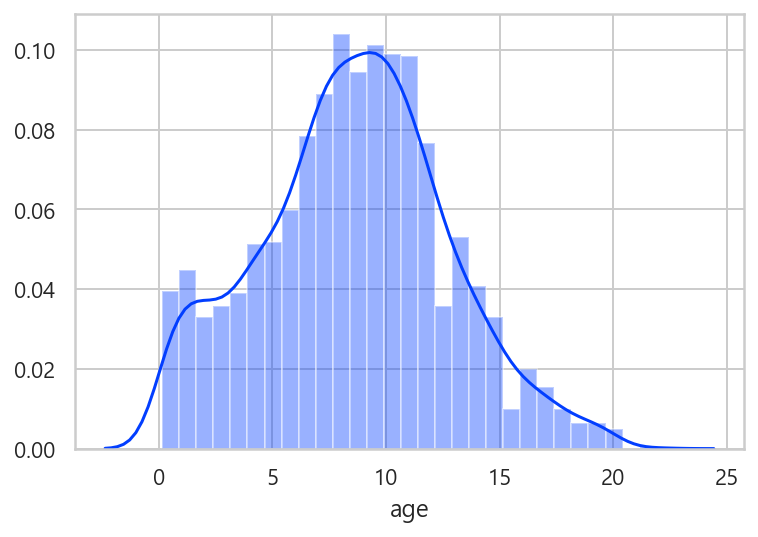

In [393]:
# seaborn 으로 히스토그램 그리기
sns.distplot(df_dog['age'])
plt.show()

#### 견 나이 환산

- young(0~5year) : 15 ~ 36
- adult(6~10year) : 40 ~ 56
- middle_age(11~15year) : 60 ~ 76
- senior(older than 15) : 80 ~

In [394]:
df_age_group_sort['dist_age'] = ""

for i in range(len(df_age_group_sort)):
    if df_age_group_sort['age'][i] > 15:
        df_age_group_sort['dist_age'][i] = 'senior'
    elif df_age_group_sort['age'][i] > 10:
        df_age_group_sort['dist_age'][i] = 'middle_aged'
    elif df_age_group_sort['age'][i] > 5:
        df_age_group_sort['dist_age'][i] = 'adult'
    else: 
        df_age_group_sort['dist_age'][i] = 'young'

In [395]:
df_age_group_sort

,age,count,dist_age
0,11.92,73,middle_aged
1,10.92,57,middle_aged
2,12.92,55,middle_aged
3,9.92,49,adult
4,7.92,39,adult
...,...,...,...
228,18.42,1,senior
229,15.83,1,senior
230,18.17,1,senior
231,14.83,1,middle_aged


In [396]:
senior_counts = []
middle_aged_counts = []
adult_counts = []
young_counts = []

for i in range(len(df_age_group_sort)):
    if df_age_group_sort['dist_age'][i] == 'senior':
        senior_count = df_age_group_sort['count'][i]
        senior_counts.append(senior_count)
    
    elif df_age_group_sort['dist_age'][i] == 'middle_aged':
        middle_aged_count = df_age_group_sort['count'][i]
        middle_aged_counts.append(middle_aged_count)
    
    elif df_age_group_sort['dist_age'][i] == 'adult':
        adult_count = df_age_group_sort['count'][i]
        adult_counts.append(adult_count)
        
    elif df_age_group_sort['dist_age'][i] == 'young':
        young_count = df_age_group_sort['count'][i]
        young_counts.append(young_count)

        

In [397]:
by_age_sum = ({'senior': sum(senior_counts), 
              'middle_aged': sum(middle_aged_counts),
              'adult': sum(adult_counts),
              'young': sum(young_counts)}) 
df_by_age_sum = pd.DataFrame(list(by_age_sum.items()))
df_by_age_sum.columns = ['dist_aged', 'count']
df_by_age_sum

,dist_aged,count
0,senior,165
1,middle_aged,885
2,adult,1272
3,young,615


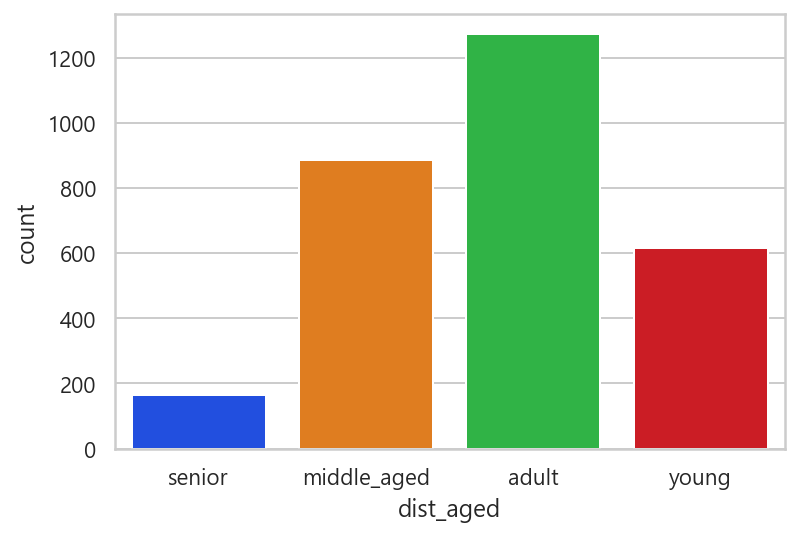

In [398]:
sns.barplot(x='dist_aged', y='count', data=df_by_age_sum)

#### senior가 가장 유기가 덜 되었고, young가 두 번째로 덜 유기되었다
#### 그에 반해 adult가 가장 많이 유기되었다

### 가설 검증

- 검증 1)
    - 1월에 발견된 수가 350건(약 11.9%)으로 가장 큰 수였지만 계절별로 비교해서 차지하지만, 그 뒤를 5월과 3월이 뒤쫓고 있다.
    - 계절별로 구분해도, 겨울(28.7%) > 봄(26.5%) > 가을(22.5%) > 여름(22.3%)으로 계절별 유기율이 별로 차이가 없다.
        
- 검증 2)
    - 견종을 알 수 없는 Unknown Mix가 51.9% 유기율이 가장 높았다.
    - 그 외에도 Mix된 종을 알 수 있는 유기견까지 포함하면 보호소 유기견 중 81.9%가 Mix 견이다
    - Unknown Mix가 아닌 수 중 3종류가 섞인 견종도 20마리나 있다.
    - 순종 중에도 유기견이 50마리 정도 있었는데, 주로 어떤 사이즈가 개들이 유기견이 됐는지 살펴봤지만, small(24) 사이즈가 확연히 적은 것에 비해 middle(117)/large(77) 순이라 사이즈는 별 차이가 없었다
        - 순종 중 가장 많은 유기견종 top3 : 
            - German Shepherd Dog
            - Labrador Retriever
            - Puli
- 검증 3) 
    - 암컷(1256)보다는 수컷(1281)이 더 많이 유기되었다.

- 검증 4)
    - 가장 많이 유기된 개의 나이는 11~12살 사이이다
    - 개 나이를 5년 단위로 senior(16-21), middle_age(11-15), adult(6-10), yount(0-5) 구분하면
    - senior > young 순으로 가장 적은 유기견이 있었다
    - 그에 반해 adult에 해당하는 유기견 개체수가 가장 많았다
    
        

### 결론

- 확실한 사실은 Unknown Mix견이 가장 많이 유기된다
- 수컷일 때 유기될 확률이 많고, 발견 당시 11~12살이었던 유기견이 가장 많았다
- 2012년부터 시작한 애견 에티켓 문화와 애견(보유)세 도입으로 책임감 있고 신중한 반려견 입양 문화가 성장되었을 것으로 예상
- 헝가리 반려동물 문화를 고려할 때 주인이 일부러 노견 등을 버리는 것보다, 실수나 견종의 활발함 때문에 집을 나온 이유도 유기견으로 발견되었던 이유 중 하나일 것이다라고 유추 가능

### 참고자료조사> 헝가리 반려동물 문화
- 헝가리는 반려견 친화도시로 뽑힐 정도로 반려동물 문화가 발달했다(https://www.mk.co.kr/news/culture/view/2018/08/549582/)
- 헝가리의 경우 2012년부터 반려동물 시장이 경기침체율에 비해 계속 상승하였고, 주변 유럽국가에 비해서도 반려동물 용품 소비가 많았다
- (http://news.kotra.or.kr/user/globalAllBbs/kotranews/album/2/globalBbsDataAllView.do?dataIdx=113884&column=&search=&searchAreaCd=&searchNationCd=&searchTradeCd=&searchStartDate=&searchEndDate=&searchCategoryIdxs=&searchIndustryCateIdx=&page=281&row=100)
- 애견보유세 도입(https://news.kotra.or.kr/user/globalBbs/kotranews/3/globalBbsDataView.do?setIdx=242&dataIdx=112083)